# Treti lekce:

## Znovu projet celou lekci a nize udelat domacak, coz bude to samy, akorat na novym datasetu:

#### nacist balicky:

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; # strednik potlaci output teto bunky -- tedy i warning o moc nove verzi numpy

In [2]:
FIG_SIZE = (10,8) #manipulate figsize globally

In [3]:
df = pd.read_csv("./data/3_lekce_houses_train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## 1. Identifikace chybějících hodnot --> df.isna().sum()
**Zadání:**
Napište funkci, která najde chybějící hodnoty v datasetu a vypíše, kolik chybějících hodnot je v každém sloupci.

#### **reseni:**

In [4]:
def null_columns(dataframe : pd.core.frame.DataFrame, relative=False):
    """Eats a dataframe and spits out a dataframe with the nullcount for each column.
    the column with the nullcounts is named 'null_counts'
    the column with the names of columns from the original datafrate is named 'col_names'
    When relative=True is set then it will return the relative nullcount instead
    """
    
    #get rowcount of original DF:
    length = len(dataframe)
    #get nullcounts per column and turn it into a DF and then rename its columns
    counts_DF = dataframe.isna().sum().reset_index().rename(columns={0:"null_counts", "index":"col_names"})
    
    #return rel or abs values
    if relative == False:
        return counts_DF
    else:
        counts_DF["null_counts"] /= length
        return counts_DF

In [5]:
null_overview = null_columns(df, relative=True)
null_overview;

#### nastavba na reseni:

In [6]:
def null_columns_only_null(dataframe : pd.core.frame.DataFrame, relative=False):
    """Eats a dataframe and spits out a dataframe with only the columns
    that contain null values. Each column_name with the nullcount for each column
    the column with the nullcounts is named 'null_counts'
    the column with the names of columns from the original datafrate is named 'col_names'"""
    null_columns_DF = null_columns(dataframe, relative=relative)
    return null_columns_DF[null_columns_DF["null_counts"]>0]
    

In [7]:
null_columns_only_null(df, relative=True);

#### kombinace obojiho predchoziho:

In [8]:
def null_count(dataframe : pd.core.frame.DataFrame, only_null=False, relative=False):
    """Eats a DF and spits out a DF with column names from the original df as rows.
    Each column name with the nullcount for said column.
    The column with the nullcounts is named 'null_counts' in the output DF.
    The column with the names of columns from the original datafrate is named 'col_names
    only_null=True returns only col_names of columns that contain at least one null value
    """
    
    if only_null == False:
        return null_columns(dataframe, relative=relative)
    else:
        return null_columns_only_null(dataframe, relative=relative)

In [9]:
null_count(df);

In [10]:
null_count(df, only_null=True, relative=True);

#### Napis funkci, co vrati unique values count pro jednotlive sloupce -- a at to ma i prepinac na relative/absolut:

In [11]:
def unique_values_count(dataframe : pd.core.frame.DataFrame, relative=True):
    """Eats a DF and spits out another DF with the ratio of unique to total values in each column of the original DF.
    When relative=False is set, then it spits out the same only with unique value counts instead of ratios.
    The output DF has column names of the original DF in the column named 'colnames' and the values in the column
    named 'uniqueness'
    """
    #reset index ze series udela DF a pak uz to jenom chceme prejmenovat metodou .rename()
    uniqueness_counts_DF = dataframe.nunique().reset_index().rename(columns={"index":"col_names", 0:"uniqueness"})
    
    length = len(dataframe)
    
    # create a copy of df with counts
    temp_DF = uniqueness_counts_DF.copy()
    
    # scale down the uniqeness by length
    temp_DF["uniqueness"] = temp_DF["uniqueness"]/length
    uniqueness_ratios_DF = temp_DF
    
    if relative==False:
        return uniqueness_counts_DF
    else:
        return uniqueness_ratios_DF
    

In [12]:
unique_values_count(df);

In [13]:
unique_values_count(df, relative=False);

#### kombofunkce dvou predchozich:

In [14]:
def get_nullness_and_uniqueness(dataframe : pd.core.frame.DataFrame, only_null=False, relative=True) -> pd.core.frame.DataFrame:
    
    # this is basically a left join on col_names:
    return pd.merge(null_count(dataframe, relative=relative, only_null=only_null), unique_values_count(dataframe, relative=relative), on="col_names", how="left" )

In [15]:
get_nullness_and_uniqueness(df, only_null=False, relative=True);

### Plot nullness and uniqueness:

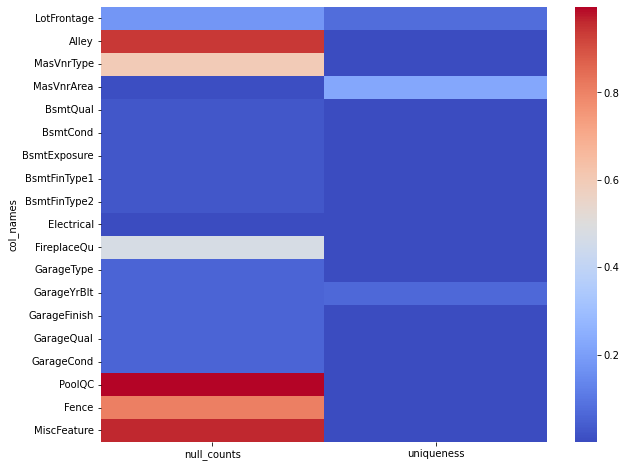

In [16]:
data = get_nullness_and_uniqueness(df, only_null=True, relative=True)

#misto umeleho indexu tam dat nas sloupec col_names
data.index=data["col_names"]

#smazat sloupec
data.drop(columns="col_names", inplace=True)
data
plt.figure(figsize=FIG_SIZE)
sns.heatmap(data, cmap='coolwarm')
plt.show()

#### dalsi ukol: get and Plot correlation heatmap

#### Vrat list nazvu sloupcu, ve kterych je ciselna hodnota:

In [17]:
def get_numeric_colnames(df: pd.core.frame.DataFrame) -> list:
    """returns a list of column names that contain numeric values (np.float64 or np.int64)"""
    col_names = []
    for column in df.columns:
        if (df[column].dtype == np.float64) or (df[column].dtype == np.int64):
            col_names.append(column)
    return col_names

snadneji takto:

In [18]:
def get_numeric_colnames(df: pd.core.frame.DataFrame) -> list:
    """returns a list of column names that contain numeric values"""
    return [col_name for col_name in df.select_dtypes(include=np.number)]

In [19]:
get_numeric_colnames(df);

In [20]:
def crop_non_numeric_columns(df: pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
    """returns only the numeric columns as a dataframe"""
    numeric_cols_DF = pd.DataFrame()
    for col_name in get_numeric_colnames(df):
        numeric_cols_DF[col_name] = df[col_name]
    return numeric_cols_DF

In [21]:
crop_non_numeric_columns(df);

In [22]:
def get_cormatrix(df: pd.core.frame.DataFrame):
    data = crop_non_numeric_columns(df)
    return data.corr()

In [23]:
get_cormatrix(df);

In [24]:
def plot_corhmap(df: pd.core.frame.DataFrame):
    """plots a correlation heatmap for df numeric values"""
    corm_DF = get_cormatrix(df)
    plt.figure(figsize=FIG_SIZE)
    sns.heatmap(corm_DF,cmap="coolwarm")
    plt.show()

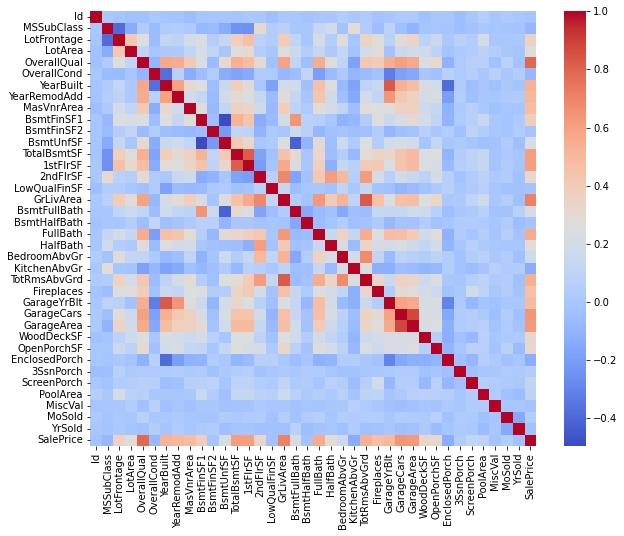

In [25]:
plot_corhmap(df)

# OTAZKY na patek:

In [26]:
#?????????
### Jakej je rozdil:

def get_numeric_colnames(df: pd.core.frame.DataFrame) -> list:
    """returns a list of column names that contain numeric values"""
    return [col_name for col_name in df.select_dtypes(include=np.number).columns]

#VERSUS:

def get_numeric_colnames(df: pd.core.frame.DataFrame) -> list:
    """returns a list of column names that contain numeric values"""
    return [col_name for col_name in df.select_dtypes(include=np.number)]

#?????????